# Praca domowa nr 6

In [2]:
#Pakiety
import pandas as pd
import numpy as np

## Zbiór danych
Krótki przegląd zbioru.

In [3]:
df = pd.read_csv("../../clustering_R3.csv")

In [3]:
df.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


In [4]:
df.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.000000
mean,240.181036,154.937365,5.454947
std,115.556334,41.964161,4.793973
min,38.516347,87.376621,0.125057
25%,148.801776,104.853322,1.806255
50%,231.754437,151.846118,3.430892
75%,350.277958,198.367658,8.287805
max,399.930758,213.917568,24.537806


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


Zbiór danych zawiera 3 zmienne numeryczne. Dane są kompletne, bez brakujących obserwacji. Po analizie podstawowych statystyk wnioskuję, że warto będzie dokonać normalizacji zmiennych. 

### Normalizacja

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Z zachowanie formatu data frame i nazw kolumn
df[df.columns] = scaler.fit_transform(df[df.columns])

In [12]:
df.describe()

,X1,X2,X3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.953193e-17,4.618528e-17,-2.553513e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.746037e+00,-1.610769e+00,-1.112346e+00
25%,-7.911724e-01,-1.194093e+00,-7.614805e-01
50%,-7.295849e-02,-7.370082e-02,-4.224195e-01
75%,9.532321e-01,1.035456e+00,5.912165e-01
max,1.383132e+00,1.406193e+00,3.982585e+00


### Wizualizacja zbioru

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def scatter_3D(df, lab, title):
    """Wykres 3D z etykietami klastrów"""
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 1]
    y = df.iloc[:, 0]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z, c = lab, cmap="Dark2")
    plt.title(title)
    ax.set_xlabel('X direction')
    ax.set_ylabel('Y direction')
    ax.set_zlabel('Z direction') 

Wizualizacja zbioru w przestrzeni 3D pokazuje, że algorytmy klasteryzujące powinny zadziałać efektywnie i dokonać podziału na klastry, które możemy samodzielnie zaobserwować .

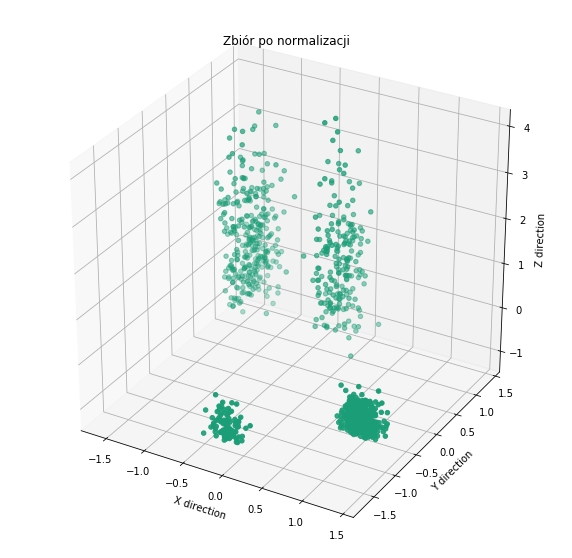

In [84]:
y = np.repeat(1, len(df))
scatter_3D(df, y, "Zbiór po normalizacji")

## Klasteryzacja 

In [64]:
#Funkcje do ewaluacji modeli
from sklearn.metrics import silhouette_score

def score_clustering_dbscan(df, model, eps_vec, score_fun):
    """Oblicza miary, za pomocą przekazanej funkcji, 
    względem parametru eps"""
    scores=[]
    for k in eps_vec:
        md = model(eps=k)
        labels = md.fit_predict(df)
        #czsami dbscan zwraca podział na jeden klaster
        #wtedy nie możemy obliczyć silhouette
        if(len(np.unique(labels))<2):
            #przyznaję 0 jeśli jeden klaster
            scores.append(0)
        else:
            score = score_fun(df, labels)
            scores.append(score)
    return(scores)

def score_clustering_gmm(df, model, n_comp_vec, score_fun):
    """Oblicza miary, za pomocą przekazanej funkcji, 
    względem parametru n_components"""
    scores=[]
    for k in n_comp_vec:
        md = model(n_components=k)
        labels = md.fit_predict(df)
        if(len(np.unique(labels))<2):
            #przyznaję 0 jeśli jeden klaster
            scores.append(0)
        else:
            score = score_fun(df, labels)
            scores.append(score)
    return(scores)

def plot_k_scores(k_vec, result, xlab, ylab, title):
    """Wizualizacja miary względem parametru"""
    plt.plot(k_vec, result, marker='h')
    plt.xticks(k_vec)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

## Metoda ewaluacji modeli
W tej pracy posłużę się jednakową metodą doboru optymalnej klasteryzacji dla obydwu modeli. Użyję współczynnika Silhouette, jego najwyższa wartość wskaże najlepszą wersję danego modelu.

## DBSCAN
Pierwszy model, który wykorzystam to DBSCAN. Kluczowym parametrem według dokumentacji dla tego algorytmu jest parametr 'eps'. Nie podajemy natomiast żądanej liczby klastrów. Z tego powodu dokonam dostrojenia parametru 'eps' do osiągnięcia najwyższej wartości współczynnika Silhouette.

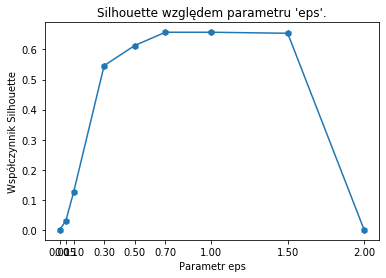

In [57]:
from sklearn.cluster import DBSCAN

eps_vec = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1, 1.5, 2]
scores = score_clustering_dbscan(df, DBSCAN, eps_vec, silhouette_score)
plot_k_scores(eps_vec, scores, "Parametr eps", "Współczynnik Silhouette", 
              "Silhouette względem parametru 'eps'.")

Na podstawie powyższego wykresu za optymalną wartość 'eps' uznaję 0.7. Warto dodać, że jest to inna wartość niż domyślna, co potwierdza konieczność strojenia tego parametru jeśli używamy DBSCAN.

## GMM (Gaussian Mixture Models)
Dla GMM doboru liczby klastrów dokonujemy parametrem 'n_components'. Najlepszą wartość znajdę w sposób analogiczny do wyboru parametru 'eps' dla DBSCAN, korzystając ze współczynnika Silhouette.

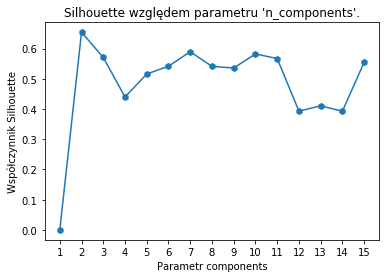

In [62]:
from sklearn.mixture import GaussianMixture

n_components_vec = range(1, 16)
scores = score_clustering_gmm(df, GaussianMixture, n_components_vec, silhouette_score)
plot_k_scores(n_components_vec, scores, "Parametr components", "Współczynnik Silhouette", 
              "Silhouette względem parametru 'n_components'.")

Najwyższą wartość współczynnika osiągamy dla n_components=2.

## Ewaluacja optymalnych modeli

In [65]:
#DBSCAN
dbscan = DBSCAN(eps = 0.7)
r_dbscan = dbscan.fit_predict(df)

In [87]:
#GMM
gmm = GaussianMixture(n_components = 2)
r_gmm = gmm.fit_predict(df)

## Wyniki

### Liczba klastrów
Ponieważ dla DBSCAN nie definiujemy wprost liczby skupień, sprawdźmy jakie rezultaty przyniosło dostrojenie modelu wyżej przedstawioną metodą.

In [67]:
print("Liczba klastrów DBSCAN: " + str(len(np.unique(r_dbscan))))

Liczba klastrów DBSCAN: 3


### Wizualizacja skupień

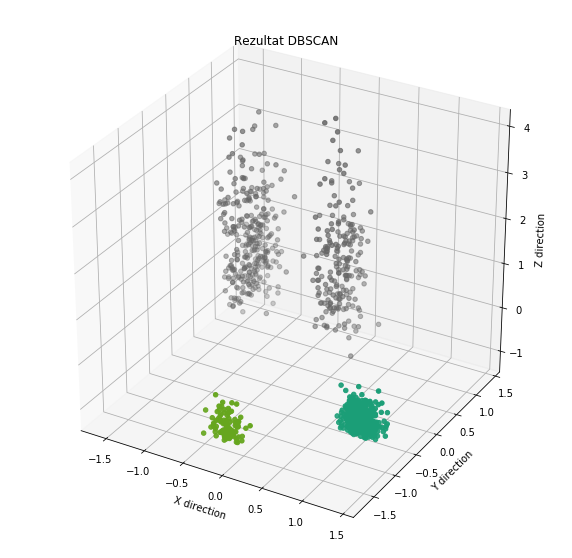

In [85]:
scatter_3D(df, r_dbscan, "Rezultat DBSCAN")

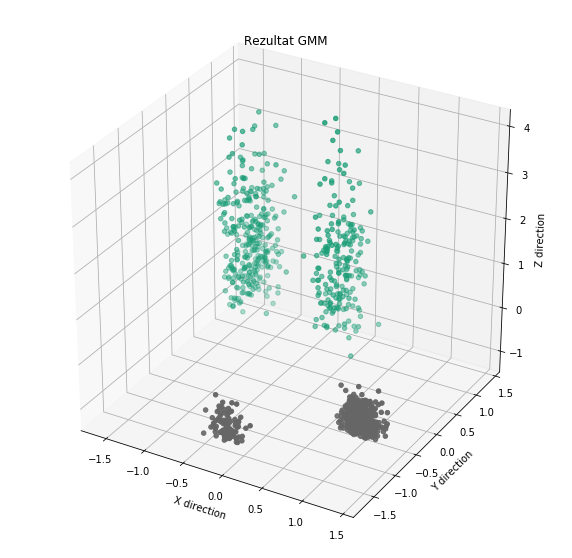

In [89]:
scatter_3D(df, r_gmm, "Rezultat GMM")

Na podstawie powyższych wizualizacji w mojej ocenie zdecydowanie lepszy podział zaproponował model DBSCAN. Uważam, że dwa gęste skupiska powinny być naturalnie traktowane jako oddzielne klastry, a GMM przydzielił je do wspólnego.  
Sprawdźmy jednak jakie wyniki innych metryk otrzymamy dla uzyskanych modeli.

## Metryki

In [90]:
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial import distance

def avg_dist_score(df, labels):
    """Oblicza miarę średniej odległości wewnątrz klastra"""
    distances = []
    for lab in labels:
        X = df.iloc[np.where(labels == lab)]
        dist_avg = np.mean(distance.pdist(X))
        distances.append(dist_avg)
    return np.mean(distances)

### Indeks Calińskiego-Harabasza
Im wyższy wynik metryki, tym lepiej powinny być zdefiniowane klastry. Indeks jest stosunkiem sumy dyspersji między klastrami do sumy dyspersji wewnątrz klastrów (gdzie dyspersję definiuje się jako sumę kwadratów odległości).

In [97]:
c_h_dbscan = calinski_harabasz_score(df, r_dbscan)
c_h_gmm = calinski_harabasz_score(df, r_gmm)
print("Wartość indeksu Calińskiego-Harabasza:")
print("DBSCAN: {0:.2f}".format(c_h_dbscan))
print("GMM: {0:.2f}".format(c_h_gmm))

Wartość indeksu Calińskiego-Harabasza:
DBSCAN: 1654.51
GMM: 2442.32


Komentarz: Sprzecznie z moją subiektywną oceną modeli, lepszy indeks uzyskał GMM. Może być to spowodowane zróżnicowaną budową zbiorów (dwa gęste skupiska vs dwa bardzo rozproszone). Według mnie wyniki tej metryki nie oceniają sprawiedliwie modeli w tym zadaniu.

### Metryka interpretowalna: średnia odległość wewnątrz klastra

In [98]:
av_dbscan = avg_dist_score(df, r_dbscan)
av_gmm = avg_dist_score(df, r_gmm)
print("Wartość metryki interpretowalnej:")
print("DBSCAN: {0:.2f}".format(av_dbscan))
print("GMM: {0:.2f}".format(av_gmm))

Wartość metryki interpretowalnej:
DBSCAN: 0.88
GMM: 1.07


Komentarz: Lepszy wynik w tej metryce uzyskał DBSACN co zgadza się z moją subiektywną oceną. Taki wynik nie dziwi, ponieważ DBSCAN rozróżnił dwa gęste skupiska, które charakteryzowały małe odległości między punktami, a te są premiowane przez tę miarę.

### Wnioski
Według mnie lepszym modelem dla tego zadania okazał się DBSCAN. Na przyszłość uważam, że dla klasteryzacji należy ocenieć modele na podstawie kilku metryk, gdyż ich konstrukcja może premiowiać odmienne cechy uzyskanych skupień. Z tego powodu indeks Calińskiego-Harabasza nie sprawdził się, w przeciwieństwie do metryki interpretowalnej.